In [47]:
import tensorflow as tf
import numpy as np
import keras
from matplotlib import pyplot as plt
import os
import numpy as np

In [66]:
from keras.models import Sequential # to keep stack of convolution layers
from keras.layers import Conv2D     # convolution poeration
from keras.layers import MaxPool2D  # pooling operation for reducing image size
from keras.layers import Dense # classical neural network
from keras.layers import Flatten #to flatten the 2d image
from keras.layers import Dropout
from keras import optimizers
from keras.models import load_model
from keras import models
from keras import layers

In [4]:
model=Sequential()
model.add(Conv2D(32,(3,3),input_shape=(224,224,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(64,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))

model.add(Conv2D(128,(3,3),activation='relu'))
model.add(MaxPool2D(2,2))


model.add(Flatten())
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.3))
model.add(Dense(1,activation='sigmoid'))

In [5]:
model.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


In [6]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 222, 222, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 111, 111, 32)      0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 109, 109, 64)      18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 54, 54, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 52, 52, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 26, 26, 128)       0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 86528)            

In [7]:
from keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale = 1./255)

validation_datagen = ImageDataGenerator(rescale = 1./255)


In [8]:
training_generator=train_datagen.flow_from_directory(r'C:\Users\tejas\Downloads\ml project\chest_xray\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator=validation_datagen.flow_from_directory(r'C:\Users\tejas\Downloads\ml project\chest_xray\val',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [9]:
hist=model.fit_generator(training_generator,
                        steps_per_epoch=8,
                        epochs=20,
                        validation_data=validation_generator,
                        validation_steps=2)


Epoch 1/20
8/8 [==============================] - 15s 2s/step - loss: 1.1700 - accuracy: 0.6328 - val_loss: 0.7501 - val_accuracy: 0.5000
Epoch 2/20
8/8 [==============================] - 15s 2s/step - loss: 0.5377 - accuracy: 0.7812 - val_loss: 1.0782 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 16s 2s/step - loss: 0.4658 - accuracy: 0.7852 - val_loss: 0.8304 - val_accuracy: 0.6250
Epoch 4/20
8/8 [==============================] - 16s 2s/step - loss: 0.3677 - accuracy: 0.8555 - val_loss: 1.1231 - val_accuracy: 0.6250
Epoch 5/20
8/8 [==============================] - 16s 2s/step - loss: 0.2666 - accuracy: 0.8750 - val_loss: 1.6664 - val_accuracy: 0.5625
Epoch 6/20
8/8 [==============================] - 16s 2s/step - loss: 0.3419 - accuracy: 0.8633 - val_loss: 0.4325 - val_accuracy: 0.7500
Epoch 7/20
8/8 [==============================] - 16s 2s/step - loss: 0.2518 - accuracy: 0.9062 - val_loss: 0.8904 - val_accuracy: 0.6250
Epoch 8/20
8/8 [=================

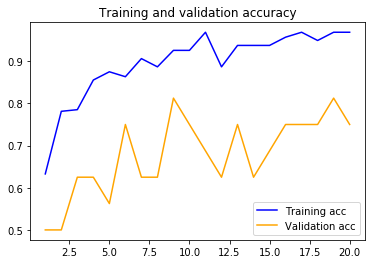

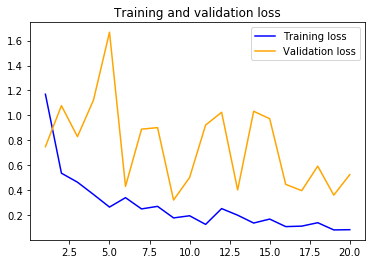

In [13]:
acc = hist.history['accuracy'] 
val_acc = hist.history['val_accuracy'] 
loss = hist.history['loss'] 
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'b', label='Training acc') 
plt.plot(epochs, val_acc, 'orange', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss') 
plt.plot(epochs, val_loss, 'orange', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [23]:
model.save('final1.h5')

In [15]:
training_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [16]:
validation_generator.class_indices

{'NORMAL': 0, 'PNEUMONIA': 1}

In [18]:
print(model.evaluate_generator(validation_generator))

[0.5263726115226746, 0.75]


In [9]:
#model=load_model('final1.h5')

In [25]:
train_datagen = ImageDataGenerator(rescale=1./255, zoom_range=0.3, rotation_range=50,
                                   width_shift_range=0.2, height_shift_range=0.2, shear_range=0.2, 
                                   horizontal_flip=True, fill_mode='nearest')
validation_datagen = ImageDataGenerator(rescale = 1./255)

In [26]:
training_generator=train_datagen.flow_from_directory(r'C:\Users\tejas\Downloads\ml project\chest_xray\train',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator=validation_datagen.flow_from_directory(r'C:\Users\tejas\Downloads\ml project\chest_xray\val',
                                                 target_size = (224, 224),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [27]:
hist=model.fit_generator(training_generator,
                        steps_per_epoch=8,
                        epochs=20,
                        validation_data=validation_generator,
                        validation_steps=2)

Epoch 1/20
8/8 [==============================] - 16s 2s/step - loss: 0.7683 - accuracy: 0.7266 - val_loss: 0.7125 - val_accuracy: 0.6250
Epoch 2/20
8/8 [==============================] - 19s 2s/step - loss: 0.5544 - accuracy: 0.7188 - val_loss: 0.9466 - val_accuracy: 0.5000
Epoch 3/20
8/8 [==============================] - 18s 2s/step - loss: 0.4707 - accuracy: 0.7891 - val_loss: 0.7739 - val_accuracy: 0.6250
Epoch 4/20
8/8 [==============================] - 19s 2s/step - loss: 0.4515 - accuracy: 0.7305 - val_loss: 0.9315 - val_accuracy: 0.5625
Epoch 5/20
8/8 [==============================] - 19s 2s/step - loss: 0.4952 - accuracy: 0.7461 - val_loss: 0.9693 - val_accuracy: 0.5625
Epoch 6/20
8/8 [==============================] - 20s 2s/step - loss: 0.5074 - accuracy: 0.7188 - val_loss: 1.0875 - val_accuracy: 0.5625
Epoch 7/20
8/8 [==============================] - 21s 3s/step - loss: 0.4557 - accuracy: 0.7578 - val_loss: 1.2774 - val_accuracy: 0.5625
Epoch 8/20
8/8 [==================

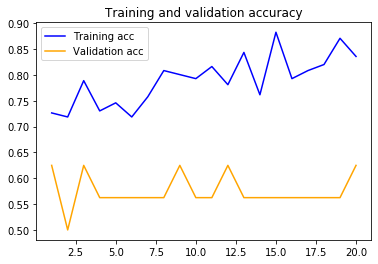

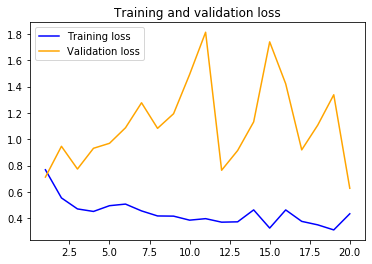

In [28]:
acc = hist.history['accuracy'] 
val_acc = hist.history['val_accuracy'] 
loss = hist.history['loss'] 
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'b', label='Training acc') 
plt.plot(epochs, val_acc, 'orange', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss') 
plt.plot(epochs, val_loss, 'orange', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [29]:
#this is worse

In [30]:
model=load_model('final1.h5')

In [31]:
print(model.evaluate_generator(validation_generator))

[0.5263726115226746, 0.75]


In [35]:
from keras.applications import VGG16

In [36]:
conv_base = VGG16(weights='imagenet',
 include_top=False,
 input_shape=(150, 150, 3))

58892288/58889256 [==============================] - 279s 5us/step


In [37]:
conv_base.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 150, 150, 3)       0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 150, 150, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 150, 150, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 75, 75, 64)        0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 75, 75, 128)       73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 75, 75, 128)       147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 37, 37, 128)       0     

In [48]:
datagen = ImageDataGenerator(rescale=1./255)
batch_size = 32

In [67]:
model1=models.Sequential()

In [69]:
model1.add(conv_base)

In [70]:
model1.add(layers.Flatten())
model1.add(layers.Dense(256, activation='relu'))
model1.add(layers.Dense(1, activation='sigmoid'))

In [71]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 16,812,353
Non-trainable params: 0
_________________________________________________________________


In [73]:
print('This is the number of trainable weights '
 'before freezing the conv base:', len(model.trainable_weights))
#This is the number of trainable weights before freezing the conv base: 30
conv_base.trainable = False
print('This is the number of trainable weights '
 'after freezing the conv base:', len(model.trainable_weights))
#This is the number of trainable weights after freezing the conv base: 4

This is the number of trainable weights before freezing the conv base: 12
This is the number of trainable weights after freezing the conv base: 12


In [74]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 2,097,665
Non-trainable params: 14,714,688
_________________________________________________________________


In [79]:
from keras.preprocessing.image import ImageDataGenerator

In [98]:
train_datagen = ImageDataGenerator(rescale = 1./255)

validation_datagen = ImageDataGenerator(rescale = 1./255)

test_datagen = ImageDataGenerator(rescale = 1./255)



In [81]:
training_generator=train_datagen.flow_from_directory(r'C:\Users\tejas\Downloads\ml project\chest_xray\train',
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

validation_generator=validation_datagen.flow_from_directory(r'C:\Users\tejas\Downloads\ml project\chest_xray\val',
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 5216 images belonging to 2 classes.
Found 16 images belonging to 2 classes.


In [83]:
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [84]:
hist=model1.fit_generator(training_generator,
                        steps_per_epoch=8,
                        epochs=30,
                        validation_data=validation_generator,
                        validation_steps=2)

Epoch 1/30
8/8 [==============================] - 22s 3s/step - loss: 0.9560 - accuracy: 0.7070 - val_loss: 0.4465 - val_accuracy: 0.8125
Epoch 2/30
8/8 [==============================] - 28s 4s/step - loss: 0.4019 - accuracy: 0.7773 - val_loss: 0.3899 - val_accuracy: 0.8125
Epoch 3/30
8/8 [==============================] - 29s 4s/step - loss: 0.2537 - accuracy: 0.9023 - val_loss: 0.6713 - val_accuracy: 0.6250
Epoch 4/30
8/8 [==============================] - 29s 4s/step - loss: 0.1414 - accuracy: 0.9375 - val_loss: 0.3898 - val_accuracy: 0.8750
Epoch 5/30
8/8 [==============================] - 33s 4s/step - loss: 0.1169 - accuracy: 0.9570 - val_loss: 0.6834 - val_accuracy: 0.6250
Epoch 6/30
8/8 [==============================] - 34s 4s/step - loss: 0.1693 - accuracy: 0.9258 - val_loss: 0.4139 - val_accuracy: 0.8750
Epoch 7/30
8/8 [==============================] - 34s 4s/step - loss: 0.1285 - accuracy: 0.9531 - val_loss: 0.5355 - val_accuracy: 0.8750
Epoch 8/30
8/8 [==================

In [85]:
model1.save('vgg16final1.h5')

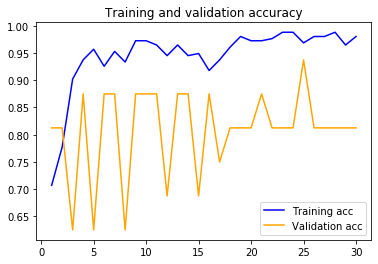

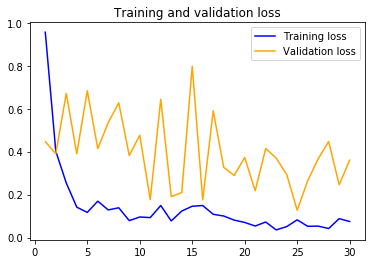

In [86]:
acc = hist.history['accuracy'] 
val_acc = hist.history['val_accuracy'] 
loss = hist.history['loss'] 
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'b', label='Training acc') 
plt.plot(epochs, val_acc, 'orange', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss') 
plt.plot(epochs, val_loss, 'orange', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [87]:
print(model1.evaluate_generator(validation_generator))

[0.3600151538848877, 0.8125]


In [90]:
conv_base.trainable=True
set_trainable=False
for layer in conv_base.layers:
    if layer.name=='block5_conv1':
        set_trainable=True
    if set_trainable:
        layer.trainable=True
    else:
        layer.trainable=False

In [91]:
model1.compile(loss='binary_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

In [92]:
model1.summary()

Model: "sequential_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Model)                (None, 4, 4, 512)         14714688  
_________________________________________________________________
flatten_2 (Flatten)          (None, 8192)              0         
_________________________________________________________________
dense_4 (Dense)              (None, 256)               2097408   
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 257       
Total params: 16,812,353
Trainable params: 9,177,089
Non-trainable params: 7,635,264
_________________________________________________________________


In [93]:
hist=model1.fit_generator(training_generator,
                        steps_per_epoch=8,
                        epochs=30,
                        validation_data=validation_generator,
                        validation_steps=2)

Epoch 1/30
8/8 [==============================] - 32s 4s/step - loss: 5.2226 - accuracy: 0.6641 - val_loss: 0.6895 - val_accuracy: 0.5000
Epoch 2/30
8/8 [==============================] - 40s 5s/step - loss: 0.4635 - accuracy: 0.8008 - val_loss: 0.7059 - val_accuracy: 0.6250
Epoch 3/30
8/8 [==============================] - 39s 5s/step - loss: 0.2839 - accuracy: 0.8750 - val_loss: 1.0629 - val_accuracy: 0.6875
Epoch 4/30
8/8 [==============================] - 41s 5s/step - loss: 0.1873 - accuracy: 0.9102 - val_loss: 0.6978 - val_accuracy: 0.6250
Epoch 5/30
8/8 [==============================] - 40s 5s/step - loss: 0.2497 - accuracy: 0.9141 - val_loss: 0.1029 - val_accuracy: 1.0000
Epoch 6/30
8/8 [==============================] - 40s 5s/step - loss: 0.1566 - accuracy: 0.9453 - val_loss: 0.1616 - val_accuracy: 1.0000
Epoch 7/30
8/8 [==============================] - 40s 5s/step - loss: 0.1579 - accuracy: 0.9570 - val_loss: 0.1900 - val_accuracy: 0.9375
Epoch 8/30
8/8 [==================

In [94]:
model1.save('vgg16finalfinetuning.h5')

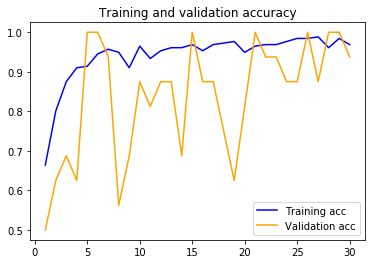

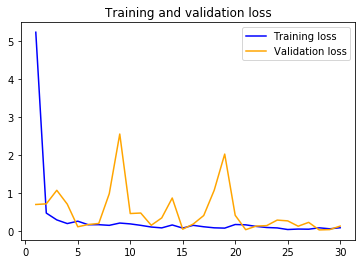

In [95]:
acc = hist.history['accuracy'] 
val_acc = hist.history['val_accuracy'] 
loss = hist.history['loss'] 
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'b', label='Training acc') 
plt.plot(epochs, val_acc, 'orange', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss') 
plt.plot(epochs, val_loss, 'orange', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [96]:
print(model1.evaluate_generator(validation_generator))

[0.12063387036323547, 0.9375]


In [99]:
test_generator=test_datagen.flow_from_directory(r'C:\Users\tejas\Downloads\ml project\chest_xray\test',
                                                 target_size = (150,150),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 624 images belonging to 2 classes.


In [100]:
test_loss, test_acc = model1.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.7519132494926453


In [102]:
test_loss, test_acc = model1.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.7512755393981934


In [103]:
hist=model1.fit_generator(training_generator,
                        steps_per_epoch=8,
                        epochs=100,
                        validation_data=validation_generator,
                        validation_steps=2)

Epoch 1/100
8/8 [==============================] - 26s 3s/step - loss: 0.0284 - accuracy: 0.9883 - val_loss: 0.0842 - val_accuracy: 0.9375
Epoch 2/100
8/8 [==============================] - 33s 4s/step - loss: 0.0446 - accuracy: 0.9805 - val_loss: 0.3456 - val_accuracy: 0.8125
Epoch 3/100
8/8 [==============================] - 33s 4s/step - loss: 0.0399 - accuracy: 0.9844 - val_loss: 0.2258 - val_accuracy: 0.8750
Epoch 4/100
8/8 [==============================] - 35s 4s/step - loss: 0.0297 - accuracy: 0.9883 - val_loss: 0.3052 - val_accuracy: 0.8750
Epoch 5/100
8/8 [==============================] - 35s 4s/step - loss: 0.0938 - accuracy: 0.9609 - val_loss: 0.1247 - val_accuracy: 0.9375
Epoch 6/100
8/8 [==============================] - 39s 5s/step - loss: 0.0363 - accuracy: 0.9883 - val_loss: 0.0667 - val_accuracy: 1.0000
Epoch 7/100
8/8 [==============================] - 36s 4s/step - loss: 0.0221 - accuracy: 0.9961 - val_loss: 0.0743 - val_accuracy: 0.9375
Epoch 8/100
8/8 [==========

In [104]:
model1.save('vgg16finalfinetuning2.h5')

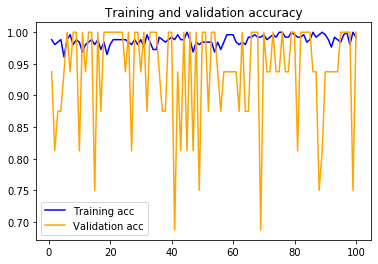

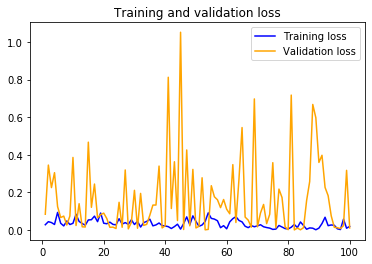

In [105]:
acc = hist.history['accuracy'] 
val_acc = hist.history['val_accuracy'] 
loss = hist.history['loss'] 
val_loss = hist.history['val_loss']
epochs = range(1, len(loss) + 1)
plt.plot(epochs, acc, 'b', label='Training acc') 
plt.plot(epochs, val_acc, 'orange', label='Validation acc') 
plt.title('Training and validation accuracy') 
plt.legend()
plt.figure()
plt.plot(epochs, loss, 'b', label='Training loss') 
plt.plot(epochs, val_loss, 'orange', label='Validation loss') 
plt.title('Training and validation loss') 
plt.legend()
plt.show()

In [106]:
test_loss, test_acc = model1.evaluate_generator(test_generator, steps=50)
print('test acc:', test_acc)

test acc: 0.8424744606018066
